# Viewing and Constructing Antenna Arrays

In this notebook, I illustrate how to view the MeerKAT array, and how to construct a simple array. 

In [46]:
import pylab as pl
import numpy as np
%matplotlib inline

def save_array_file(x=None, y=None, z=None, filename=None):
    '''
    Function to save your array positions to a file.
    '''
    header = 'observatory = meerkat\n coordsys=LOC (local tangent plane)\n x y z diam'
    diam = np.ones(len(x))*13.5
    np.savetxt(filename,zip(x,y,z,diam),  header=header, fmt='%2.5f')

## MeerKAT

The MeerKAT dish positions are provided in a text or `.cfg` file. The columns correspond to the x, y, z and dish-diameter values, respectively, where:
* x is the east-west offset from centre, in metres.
* y is the north-south offset from centre, in metres.
* z is the altitude offset with respect to the telescope central position, in metres.
* The diameter is 13.5 metres.

The header of the file specifies the observatory, which is **MeerKAT**. CASA has a lookup-table for observatory central positions, so if you provide a file with dish positions, you need only specify the observatory name in the header for CASA to _know_ where to place the antennas. In the previous cell I have added a header text string which will do this for you automatically.

In the next cell I am going to load and plot the MeerKAT dish locations. I am going to use the `scatter` command to illustrate how the dishes vary in altitude with respect to the altitude of the central position. This will illustrate that although the maximum distance between dishes is only 8-km, there is a small variation in the altitude of the dishes due to the curvature of the Earth. 

In [54]:
meerkat = np.loadtxt('/home/fox/notebooks/meerkat.cfg')

(-4000, 4000)

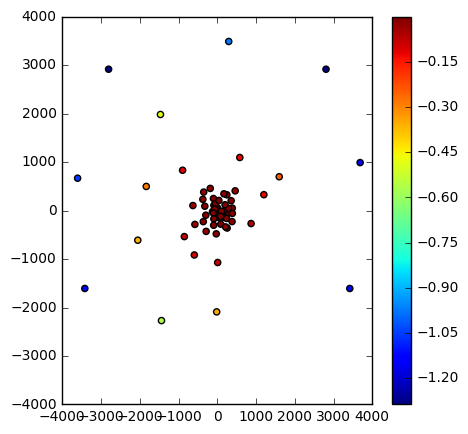

In [55]:
pl.figure(figsize=(5,5))
pl.scatter(meerkat[:,0], meerkat[:,1], c=meerkat[:,2])
pl.colorbar()
pl.xlim(-4000,4000)
pl.ylim(-4000,4000)

## My Array

You need only specify the x, y and z positions to determine an array, and we're going to make a simplifying assumption that the antennas are identically coplanar. This is, of course, unrealistic, but is okay for the purposes of your project.

I am going to produce an array where the x-positions vary linearly, and where the y-positions are drawn from a Gaussian distribution.

In [56]:
x = np.linspace(-100, 100, 20)
y = np.random.randn(20)*100
z = np.zeros(len(x))

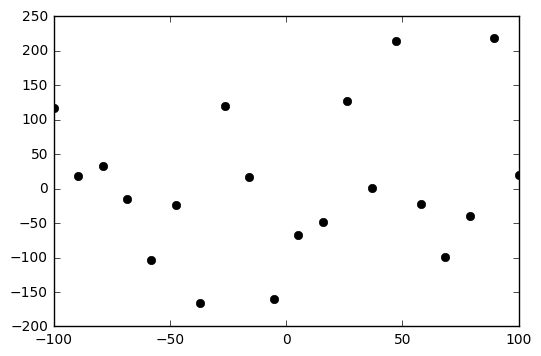

In [57]:
pl.plot(x, y, 'ko')

Now I need to save the array, using the function that I have defined before:

In [59]:
save_array_file(x=x, y=y, z=z, filename='my-array.cfg')